# Trending YouTube Video 频繁模式与关联规则挖掘
仓库地址为：https://github.com/Wchoward/DataMiningClass/tree/master/assignment2

In [1]:
%matplotlib inline
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
import youtube_process

In [2]:
import json
def get_category_list(path,filename):
    with open(path + '/' + filename ,'r') as f:
        d = json.load(f)
    res = {}
    for i in d['items']:
        res[int(i['id'])] = i['snippet']['title']
    return res

In [3]:
def load_data(path,filename):
    return pd.read_csv(path + '/' + filename,keep_default_na=False,low_memory=False)

确定数据集根目录：

In [4]:
root = 'data/youtube-new/'

### 选取美国数据集进行频繁模式与关联规则挖掘

In [5]:
US = youtube_process.country_data(root, 'USvideos.csv')
US_data = US.data
US_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


数据包含：  
1. video_id  视频id
2. trending_date  流行日期
3. title  标题
4. channel_title  频道标题
5. category_id  类别id
6. publish_time  发布时间
7. tags  标签
8. views  观看量
9. likes  点赞量
10. dislikes  踩量
11. comment_count  评论数量
12. thumbnail_link  视频链接
13. comments_disabled  是否禁止评论
14. ratings_disabled  是否禁止评分
15. video_error_or_removed  视频是否失效或被移除
16. description  介绍

## 将数据集转换成适合进行关联规则挖掘的形式

选择挖掘视频类别(category)与观看量(views)的关联关系，从而挖掘出大众篇好的视频类别

In [6]:
df = US_data[['category_id','views']]
df

,category_id,views
0,22,748374
1,24,2418783
2,23,3191434
3,24,343168
4,24,2095731
...,...,...
40944,15,1685609
40945,22,1064798
40946,24,1066451
40947,1,5660813


将category_id映射到具体的category类别名：

In [7]:
US_category_map = get_category_list(root, 'US_category_id.json')
US_category_map

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [8]:
df1 = df['category_id'].map(US_category_map)
df = pd.concat([df,df1],axis=1)
df.columns=['category_id','views','category']

由于views数值型数据，需要将其转化为离散型数据,按照作业1中的五数分布及离群点划分视频观看等级。

In [9]:
def grading_views(views):
    US_views_map = lambda x: {
        x >= 4194399 : 'S',
        1823157 <= x < 4194399 : 'A',
        681861 <= x < 1823157 : 'B',
        242329 <= x < 681861 : 'C',
        549 <= x < 242329 : 'D',
    }
    return US_views_map(views)[True]

views_grade = []
for views in df['views'].values:
    views_grade.append(grading_views(views))
df['views_grade'] = views_grade

In [10]:
df = df.drop(['category_id','views'],axis=1)
df

,category,views_grade
0,People & Blogs,B
1,Entertainment,A
2,Comedy,A
3,Entertainment,C
4,Entertainment,A
...,...,...
40944,Pets & Animals,B
40945,People & Blogs,B
40946,Entertainment,B
40947,Film & Animation,S


转换表格为模型可接受数据：

In [11]:
from mlxtend.preprocessing import TransactionEncoder # 传入模型的数据需要满足特定的格式，可以用这种方法来转换为bool值，也可以用函数转换为0、1

def deal(data):
    return data.dropna().tolist()

df_arr = df.apply(deal,axis=1).tolist() # 转化成列表
te = TransactionEncoder()  # 定义模型
df_tf = te.fit_transform(df_arr)
df = pd.DataFrame(df_tf,columns=te.columns_)
df

,A,Autos & Vehicles,B,C,Comedy,D,Education,Entertainment,Film & Animation,Gaming,...,Music,News & Politics,Nonprofits & Activism,People & Blogs,Pets & Animals,S,Science & Technology,Shows,Sports,Travel & Events
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
40945,False,False,True,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
40946,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
40947,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


## 求频繁项集

导入apriori方法设置最小支持度min_support=0.005求频繁项集

In [12]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df,min_support=0.005,use_colnames=True)
frequent_itemsets.sort_values(by='support',ascending=False,inplace=True)
frequent_itemsets

,support,itemsets
2,0.249994,(B)
3,0.249994,(C)
5,0.249994,(D)
7,0.243327,(Entertainment)
11,0.158050,(Music)
...,...,...
66,0.005983,"(S, Sports)"
27,0.005470,"(A, Sports)"
22,0.005373,"(A, Gaming)"
37,0.005226,"(B, Pets & Animals)"


## 导出关联规则并计算支持度和置信度

导入association_rules求得关联规则

In [13]:
from mlxtend.frequent_patterns import association_rules
association_rule = association_rules(frequent_itemsets,metric='lift')
association_rule = association_rule.sort_values(by='lift',ascending=False).reset_index(drop=True)
association_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(S),(Music),0.109868,0.158050,0.043982,0.400311,2.532809,0.026617,1.403978
1,(Music),(S),0.158050,0.109868,0.043982,0.278276,2.532809,0.026617,1.233340
2,(News & Politics),(D),0.060734,0.249994,0.030111,0.495778,1.983161,0.014927,1.487452
3,(D),(News & Politics),0.249994,0.060734,0.030111,0.120445,1.983161,0.014927,1.067888
4,(Gaming),(A),0.019952,0.140150,0.005373,0.269278,1.921355,0.002576,1.176713
...,...,...,...,...,...,...,...,...,...
75,(A),(Science & Technology),0.140150,0.058634,0.007277,0.051925,0.885587,-0.000940,0.992924
76,(D),(Film & Animation),0.249994,0.057266,0.012284,0.049135,0.858017,-0.002033,0.991449
77,(Film & Animation),(D),0.057266,0.249994,0.012284,0.214499,0.858017,-0.002033,0.954812
78,(Education),(B),0.040441,0.249994,0.008132,0.201087,0.804367,-0.001978,0.938783


## 规则评价

定义规则评价函数，求得Jaccard，cosine，Kulczynski值

In [14]:
import math
def metrics(r,f):
    ans = []
    for i in range(r.shape[0]):
        item = r.iloc[i]
        ans.append(f(item))
    return ans
def Jaccard(item):
    return item.support/(item['antecedent support']+item['consequent support']-item.support)
def allconf(item):
    return item.support/max(item['antecedent support'],item['consequent support'])
def cosine(item):
    return item.support/math.sqrt(item['antecedent support']*item['consequent support'])
def maxconf(item):
    return max(item.support/item['antecedent support'],item.support/item['consequent support'])
def Kulczynski(item):
    return 0.5*(item.support/item['antecedent support']+item.support/item['consequent support'])

In [15]:
association_rule['Jaccard'] = metrics(association_rule, Jaccard)
association_rule['Cosine'] = metrics(association_rule, cosine)
association_rule['Kulczynski'] = metrics(association_rule, Kulczynski)
association_rule.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,Jaccard,Cosine,Kulczynski
0,(S),(Music),0.109868,0.158050,0.043982,0.400311,2.532809,0.026617,1.403978,0.196401,0.333762,0.339293
1,(Music),(S),0.158050,0.109868,0.043982,0.278276,2.532809,0.026617,1.233340,0.196401,0.333762,0.339293
2,(News & Politics),(D),0.060734,0.249994,0.030111,0.495778,1.983161,0.014927,1.487452,0.107301,0.244365,0.308112
3,(D),(News & Politics),0.249994,0.060734,0.030111,0.120445,1.983161,0.014927,1.067888,0.107301,0.244365,0.308112
4,(Gaming),(A),0.019952,0.140150,0.005373,0.269278,1.921355,0.002576,1.176713,0.034722,0.101600,0.153806
5,(A),(Gaming),0.140150,0.019952,0.005373,0.038334,1.921355,0.002576,1.019115,0.034722,0.101600,0.153806
6,(C),(Education),0.249994,0.040441,0.019292,0.077171,1.908259,0.009182,1.039802,0.071152,0.191872,0.277112
7,(Education),(C),0.040441,0.249994,0.019292,0.477053,1.908259,0.009182,1.434192,0.071152,0.191872,0.277112
8,(S),(Film & Animation),0.109868,0.057266,0.011478,0.104468,1.824241,0.005186,1.052708,0.073737,0.144700,0.152447
9,(Film & Animation),(S),0.057266,0.109868,0.011478,0.200426,1.824241,0.005186,1.113258,0.073737,0.144700,0.152447


## 挖掘结果可视化

横坐标为support，纵坐标为confidence，透明度为lift值的高低，绘制散点图

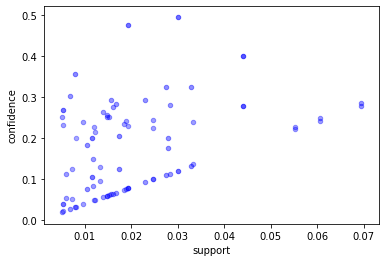

In [16]:
import  matplotlib.pyplot as plt
plt.xlabel('support')
plt.ylabel('confidence')
for i in range(association_rule.shape[0]):
    plt.scatter(association_rule.support[i],association_rule.confidence[i],s=20,c='b',alpha=(association_rule.lift.iloc[i])/(association_rule.lift.iloc[0])*0.8/(association_rule.lift.iloc[0]-association_rule.lift.iloc[-1])+0.2)

横坐标为support，纵坐标为confidence，透明度为Cosine值的高低，绘制散点图

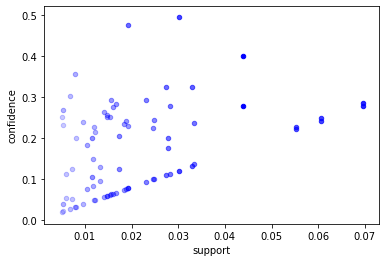

In [17]:
plt.xlabel('support')
plt.ylabel('confidence')
association_rule = association_rule.sort_values(by='Cosine',ascending=False).reset_index(drop=True)
for i in range(association_rule.shape[0]):
    plt.scatter(association_rule.support[i],association_rule.confidence[i],s=20,c='b',alpha=(association_rule.Cosine.iloc[i])/(association_rule.Cosine.iloc[0]))

横坐标为support，纵坐标为confidence，透明度为Jaccard值的高低，绘制散点图

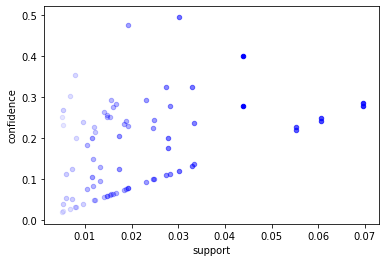

In [18]:
plt.xlabel('support')
plt.ylabel('confidence')
association_rule = association_rule.sort_values(by='Jaccard',ascending=False).reset_index(drop=True)
for i in range(association_rule.shape[0]):
    plt.scatter(association_rule.support[i],association_rule.confidence[i],s=20,c='b',alpha=(association_rule.Jaccard.iloc[i])/(association_rule.Jaccard.iloc[0]))

## 挖掘结果进行分析

结果表明：
- Music类别的youtube视频观看的人更多，为S级，他们之间具有很强的相关性。
- News & Politics类别的youtube视频观看的人最少，为D级，他们之间同样具有很强的相关性。
- Film & Animation类别的youtube视频观看的人同样更多，为S级
